In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss,roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('dim_users.csv')

/Users/chinnu/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unnamed: 0,id,created_at,email,original_arrival_date,referrer,registry_created_at,source,updated_at,baby_registry_101_subscribed_at,...,sponsored_delivered,sponsored_open,sponsored_click,sponsored_last_open_at,sponsored_unsubscribe_at,transactional_delivered,transactional_open,transactional_click,transactional_last_open_at,is_active
0,0,1,2010-11-19 17:59:24,user-1@babylist.com,2017-02-16 00:00:00,NaN,NaN,registry,2017-10-17 21:54:05,2017-05-21 21:21:26,...,19,7,0,2017-09-16 00:17:49,NaN,401,285,19,2017-10-17 05:00:14,1.0
1,1,2,2010-12-17 00:37:28,user-2@babylist.com,2017-05-08 00:00:00,NaN,NaN,registry,2017-10-17 21:54:05,NaN,...,24,9,0,2017-09-09 00:28:16,NaN,52,30,2,2017-10-10 04:14:25,1.0
2,2,3,2010-12-18 17:48:23,user-3@babylist.com,NaN,NaN,NaN,NaN,2017-10-17 21:54:05,NaN,...,0,0,0,NaN,NaN,0,0,0,NaN,NaN
3,3,4,2010-12-20 17:32:17,user-4@babylist.com,NaN,NaN,NaN,NaN,2017-10-17 21:54:05,NaN,...,0,0,0,NaN,NaN,0,0,0,NaN,NaN
4,4,5,2010-12-20 17:33:25,user-5@babylist.com,NaN,NaN,NaN,NaN,2017-10-17 21:54:05,NaN,...,0,0,0,NaN,NaN,0,0,0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567065 entries, 0 to 1567064
Data columns (total 37 columns):
id                                  1567065 non-null int64
created_at                          1567065 non-null datetime64[ns]
email                               1567065 non-null object
original_arrival_date               1354648 non-null object
referrer                            140810 non-null object
registry_created_at                 728133 non-null datetime64[ns]
source                              1478900 non-null object
updated_at                          1567065 non-null datetime64[ns]
baby_registry_101_subscribed_at     409463 non-null datetime64[ns]
newsletter_subscribed_at            1089010 non-null datetime64[ns]
pregnancy_weekly_subscribed_at      315046 non-null datetime64[ns]
sponsored_subscribed_at             737933 non-null datetime64[ns]
baby_registry_101_delivered         1567065 non-null int64
baby_registry_101_open              1567065 non-null int64

In [9]:
df.describe()

,id,baby_registry_101_delivered,baby_registry_101_open,baby_registry_101_click,newsletter_delivered,newsletter_open,newsletter_click,pregnancy_weekly_delivered,pregnancy_weekly_open,pregnancy_weekly_click,sponsored_delivered,sponsored_open,sponsored_click,transactional_delivered,transactional_open,transactional_click,is_active
count,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1.567065e+06,1474199.0
mean,7.906590e+05,2.392900e+00,5.697013e-01,7.518514e-02,1.488352e+01,2.427340e+00,7.131689e-01,2.208470e+00,5.756577e-01,1.754414e-01,8.851663e+00,1.547157e+00,7.679005e-02,2.592590e+00,1.224066e+00,3.107044e-01,1.0
std,4.536606e+05,4.438249e+00,1.815840e+00,5.296058e-01,1.600636e+01,5.768783e+00,2.671159e+00,5.053136e+00,2.144060e+00,9.821718e-01,1.096698e+01,3.749881e+00,5.241390e-01,8.024945e+00,4.781886e+00,1.498903e+00,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,3.987030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,7.909800e+05,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,1.183746e+06,2.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.0
max,1.575641e+06,4.100000e+01,3.400000e+01,1.150000e+02,6.000000e+01,8.900000e+01,5.690000e+02,5.000000e+01,4.500000e+01,5.700000e+01,3.200000e+01,3.300000e+01,2.060000e+02,4.010000e+02,2.850000e+02,1.080000e+02,1.0


In [10]:
df.columns

Index(['id', 'created_at', 'email', 'original_arrival_date', 'referrer',
       'registry_created_at', 'source', 'updated_at',
       'baby_registry_101_subscribed_at', 'newsletter_subscribed_at',
       'pregnancy_weekly_subscribed_at', 'sponsored_subscribed_at',
       'baby_registry_101_delivered', 'baby_registry_101_open',
       'baby_registry_101_click', 'baby_registry_101_last_open_at',
       'baby_registry_101_unsubscribe_at', 'newsletter_delivered',
       'newsletter_open', 'newsletter_click', 'newsletter_last_open_at',
       'newsletter_unsubscribe_at', 'pregnancy_weekly_delivered',
       'pregnancy_weekly_open', 'pregnancy_weekly_click',
       'pregnancy_weekly_last_open_at', 'pregnancy_weekly_unsubscribe_at',
       'sponsored_delivered', 'sponsored_open', 'sponsored_click',
       'sponsored_last_open_at', 'sponsored_unsubscribe_at',
       'transactional_delivered', 'transactional_open', 'transactional_click',
       'transactional_last_open_at', 'is_active'],
      

# Initial Analysis

To check for outliers and general trends in the data

In [11]:
df['created_at_monthyear'] = df['created_at'].dt.date.apply(lambda x: dt.date(x.year,x.month,1))

Getting the monthly trend- visual on the number of emails created in the system

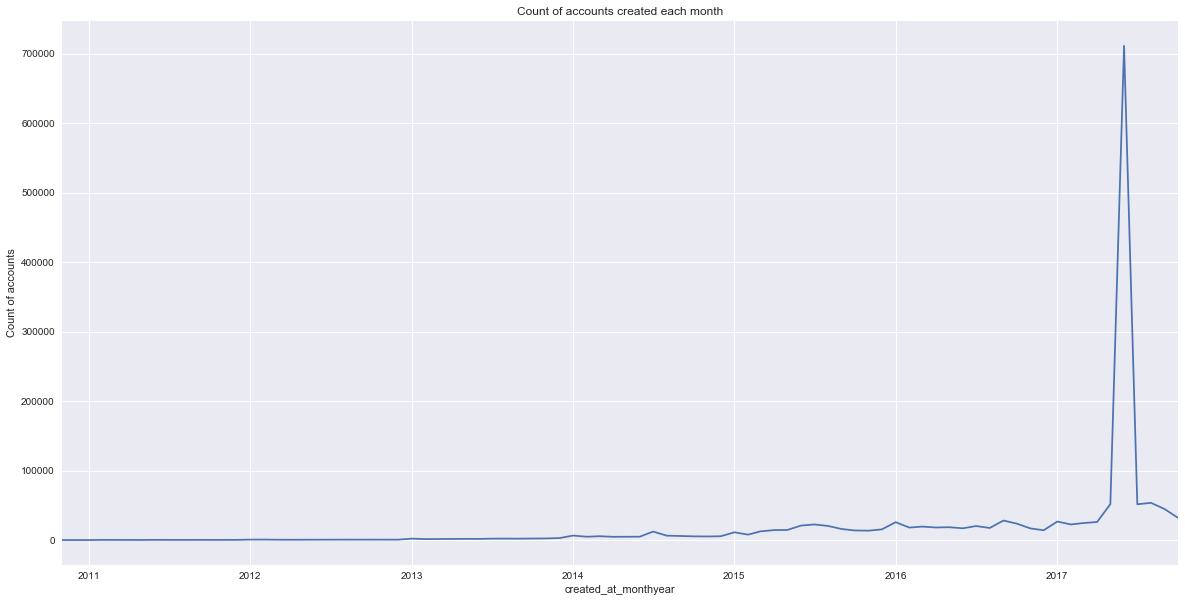

In [12]:
plt.figure(figsize=(20,10))
df.groupby('created_at_monthyear')['email'].count().plot(kind='line')
plt.title('Count of accounts created each month')
plt.ylabel('Count of accounts')

There seems to be a spike in one of the months in 2017. Let's investigate

In [13]:
created_at_2017_data = df.loc[df.created_at_monthyear > dt.date(2016,12,1)]

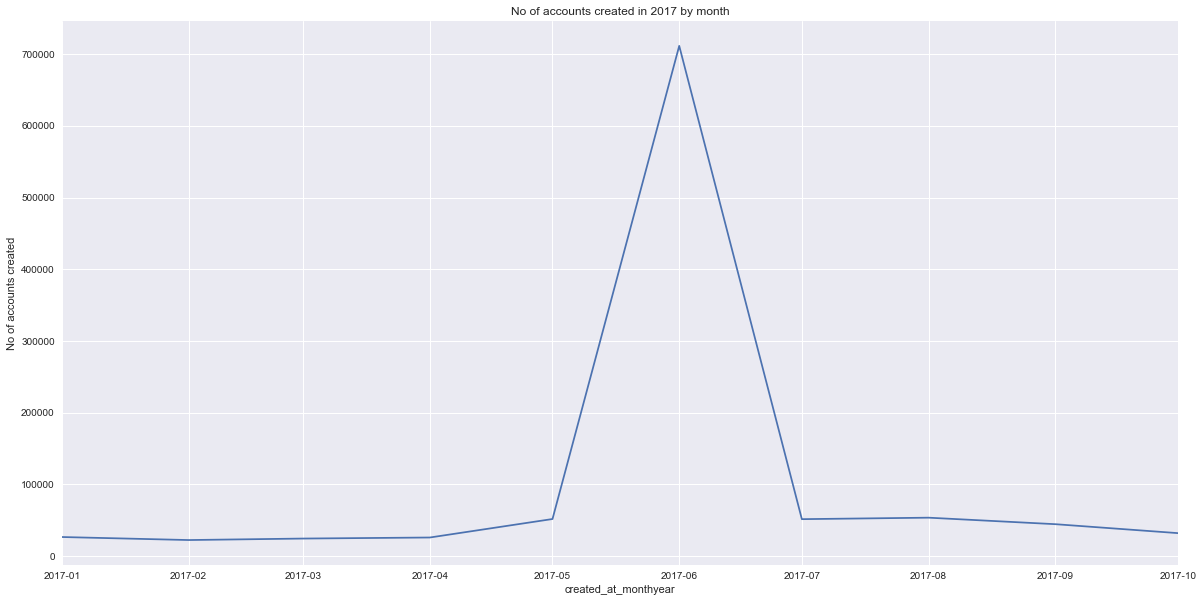

In [14]:
plt.figure(figsize=(20,10))
created_at_2017_data.groupby('created_at_monthyear')['email'].count().plot(kind='line')
plt.title('No of accounts created in 2017 by month')
plt.ylabel('No of accounts created')

The spike seems to mainly originate from the month of June in 2017. While trying to understand what might be the possible cause of the spike, it seems to have originated due to a giveaway during that time period. There is FB post promoting the 'Mama's got this' giveaway on 28 June.

In [15]:
created_at_jun_2017_data = df.loc[(df.created_at < dt.date(2017,7,1))&(df.created_at >= dt.date(2017,6,1))]

In [16]:
created_at_jun_2017_data['created_at_date'] = created_at_jun_2017_data.created_at.dt.date

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


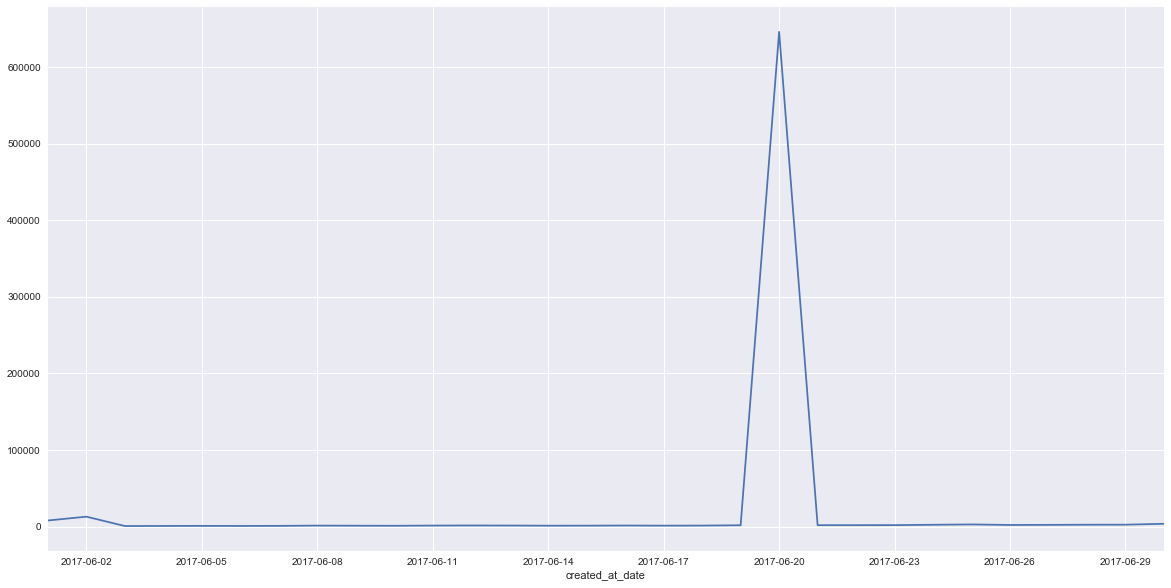

In [17]:
plt.figure(figsize=(20,10))
created_at_jun_2017_data.groupby('created_at_date')['email'].count().plot(kind='line')

Aha!!! The spike is closer to the FB post about the 'Mama's Got This' giveaway!

Yes, the spike could be due to the giveaway, but it can also be a system logging issue or spam account creation. Let's dive in deeper into that spike.

In [18]:
anomaly_june_2017_data = created_at_jun_2017_data.loc[created_at_jun_2017_data.created_at_date == dt.date(2017,6,20)]

In [19]:
check = anomaly_june_2017_data.groupby('source')['email','is_active'].count().reset_index()
check['difference'] = check.email - check.is_active
check

,source,email,is_active,difference
0,checklist,242128,242092,36
1,email:pregnancy:direct,344,344,0
2,giveaway,401916,401900,16
3,registry,1380,1376,4


It doesn't seem like they are spam accounts, since almost all the accounts created then are active. Only 56 accounts seem to be currently inactive.

Let's go ahead with our analysis to see if the anomaly affects the outcomes of the other analysis.

## Question 1 and 2- Can you describe how our email list(s) are growing and churning?

Let's look at the growth rate of each of the email lists. For this we'll be looking at the subscribed and unsubscribed users in that month for each email group.

First, we need to get the total list size for each month in 2017 (since the email subscriptions start in Jan 2017)

In [20]:
#Getting created at email list counts for each month 
rolling_email_counts = df.groupby('created_at_monthyear')['email'].count().cumsum().reset_index()
rolling_email_counts_2017 = rolling_email_counts.loc[rolling_email_counts.created_at_monthyear > dt.date(2016,12,1)]
rolling_email_counts_2017.columns = ['created_at_monthyear','total_email']
rolling_email_counts_2017['created_at_monthyear'] = rolling_email_counts_2017['created_at_monthyear'].\
                apply(lambda x: x.strftime('%Y-%m')if not pd.isnull(x) else '')
rolling_email_counts_2017

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,created_at_monthyear,total_email
74,2017-01,549254
75,2017-02,571658
76,2017-03,596146
77,2017-04,622095
78,2017-05,673820
79,2017-06,1385367
80,2017-07,1436900
81,2017-08,1490497
82,2017-09,1535022
83,2017-10,1567065


In [21]:
types_of_emails = ['baby_registry_101','newsletter','pregnancy_weekly','sponsored']

### To obtain the growth and churn rate for each email type, we need to create the following columns
* Month when user subscribed to each email list
* Month when user unsubscribed to each email list
* Growth rate for each month- $growth rate = \frac{new subscribers - unsubscribers}{total list size}$
* Churn rate for each month- $churn rate = \frac{unsubscribers}{total list size}$

In [756]:
def growth_rate_email_data(email_type,df,rolling_email_counts_2017):
    '''Function for calculating the growth and churn rate for each email series'''
    
    email_data = df[['email','referrer', 'registry_created_at', 'source', 'updated_at',\
                        email_type+'_subscribed_at', email_type+'_delivered', \
                        email_type+'_open',email_type+'_click', email_type+'_last_open_at',
                        email_type+'_unsubscribe_at','is_active']]
#     email_data['subscribed_at_date'] = email_data[email_type+'_subscribed_at'].dt.date
    email_data['subscribed_at_monthyear'] = email_data[email_type+'_subscribed_at'].\
                apply(lambda x: x.strftime('%Y-%m')if not pd.isnull(x) else '')
    email_data['unsubscribed_at_monthyear'] = email_data[email_type+'_unsubscribe_at'].\
                apply(lambda x: x.strftime('%Y-%m')if not pd.isnull(x) else '')
    subscribe_data = email_data.groupby('subscribed_at_monthyear')['email'].count().reset_index()
    subscribe_data.drop(subscribe_data.head(1).index,axis=0,inplace=True)
    unsubscribe_data = email_data.groupby('unsubscribed_at_monthyear')['email'].count().reset_index()
    unsubscribe_data.drop(unsubscribe_data.head(1).index,axis=0,inplace=True)
    calculate_growth_rate = subscribe_data.merge(unsubscribe_data,how='left', left_on='subscribed_at_monthyear',\
                              right_on='unsubscribed_at_monthyear')
    calculate_growth_rate = calculate_growth_rate.merge(rolling_email_counts_2017,how='left', left_on='subscribed_at_monthyear',\
                              right_on='created_at_monthyear')
    calculate_growth_rate.fillna(0,inplace=True)
    calculate_growth_rate['growth_rate'] = 100*(calculate_growth_rate.email_x - \
                                                calculate_growth_rate.email_y)/calculate_growth_rate.total_email
    calculate_growth_rate['churn_rate'] = 100*(calculate_growth_rate.email_y)/calculate_growth_rate.total_email
    calculate_growth_rate['retention_rate'] = 100 - calculate_growth_rate.churn_rate
    
    sns.factorplot(x='subscribed_at_monthyear',y='growth_rate',data=calculate_growth_rate,size=6,aspect=2)
    plt.title('Growth Rate for '+email_type)
    sns.factorplot(x='subscribed_at_monthyear',y='churn_rate',data=calculate_growth_rate,size=6,aspect=2)
    plt.title('Churn Rate for '+email_type)
    return calculate_growth_rate

In [804]:
growth_rate_pregnancy

,subscribed_at_monthyear,email_x,unsubscribed_at_monthyear,email_y,created_at_monthyear,total_email,pregnancy_growth,pregnancy_churn,retention_rate
0,2017-05,21784,0,0.0,2017-05,673820,3.232911,0.000000,100.000000
1,2017-06,168524,0,0.0,2017-06,1385367,12.164574,0.000000,100.000000
2,2017-07,39395,2017-07,5154.0,2017-07,1436900,2.382977,0.358689,99.641311
3,2017-08,39402,2017-08,10611.0,2017-08,1490497,1.931638,0.711910,99.288090
4,2017-09,30728,2017-09,8579.0,2017-09,1535022,1.442911,0.558884,99.441116
5,2017-10,15213,2017-10,3556.0,2017-10,1567065,0.743875,0.226921,99.773079


/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


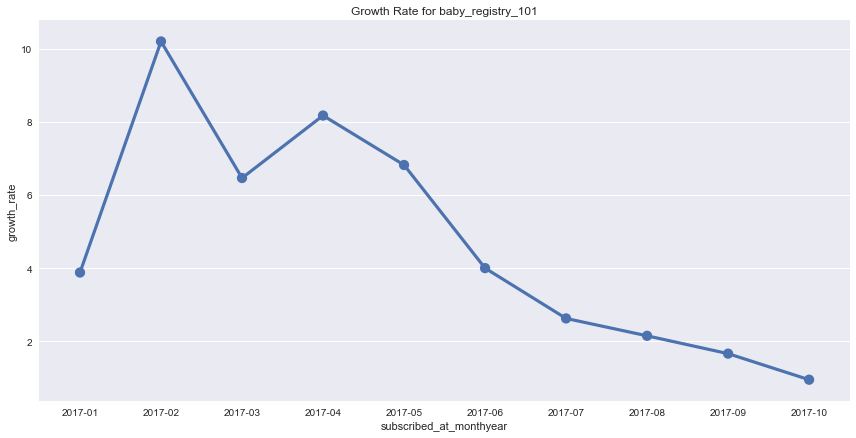

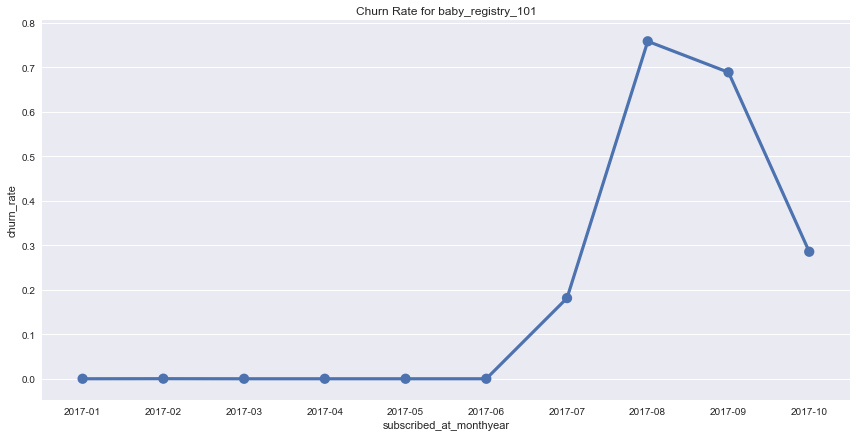

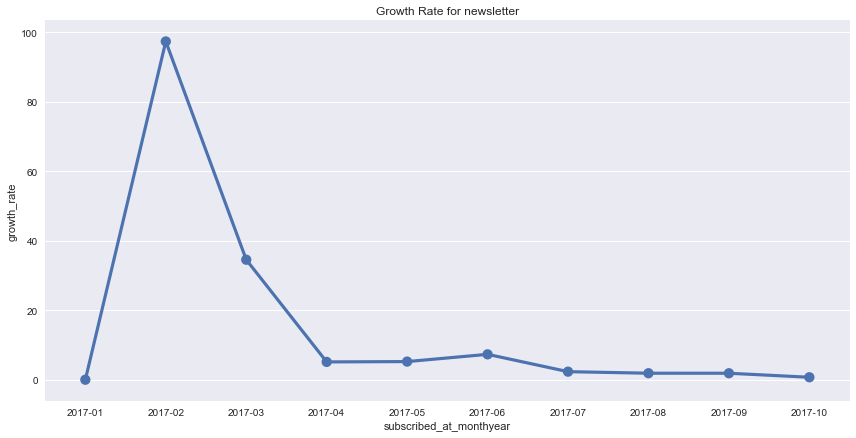

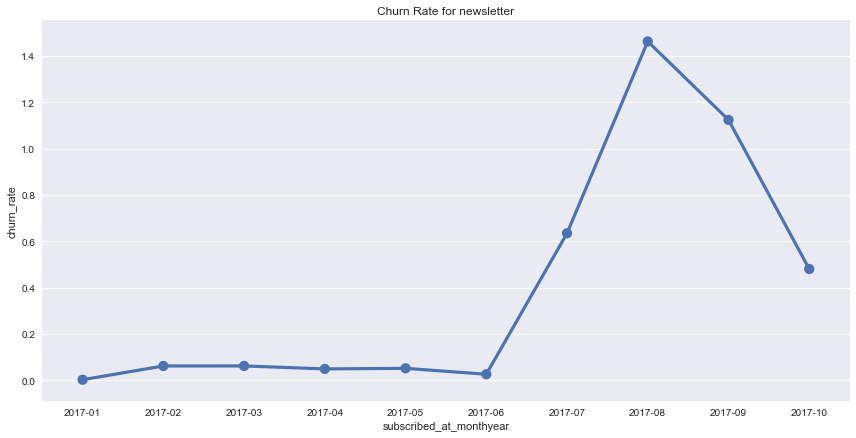

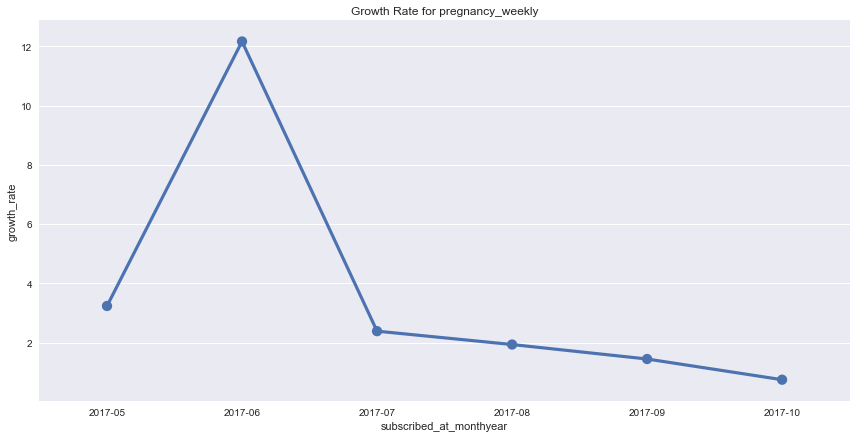

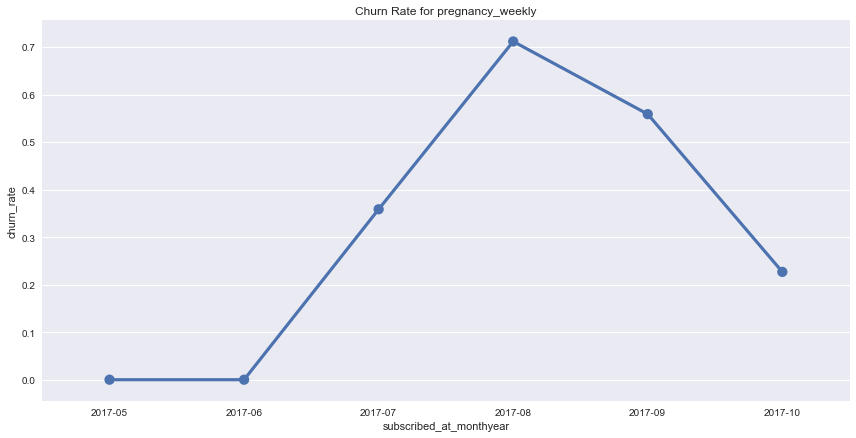

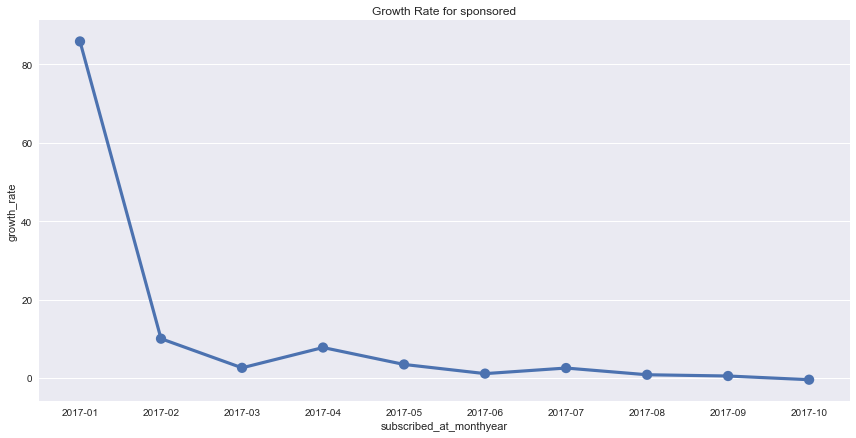

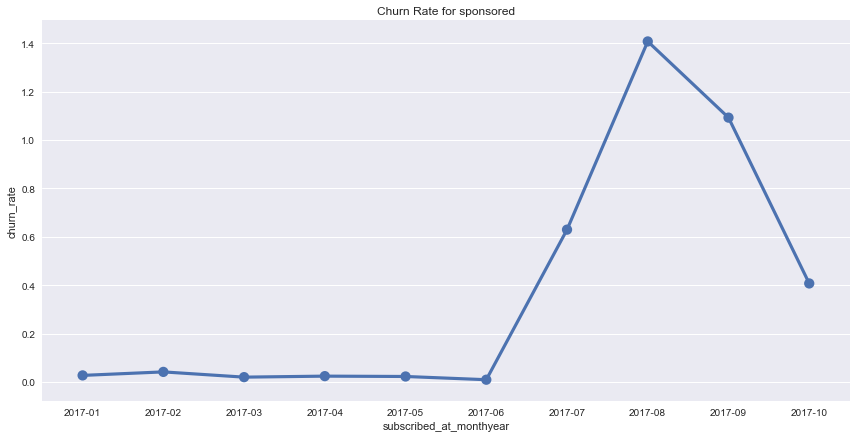

In [757]:
growth_rate_baby_reg = growth_rate_email_data(types_of_emails[0],df,rolling_email_counts_2017)
growth_rate_newsletter = growth_rate_email_data(types_of_emails[1],df,rolling_email_counts_2017)
growth_rate_pregnancy = growth_rate_email_data(types_of_emails[2],df,rolling_email_counts_2017)
growth_rate_sponsored = growth_rate_email_data(types_of_emails[3],df,rolling_email_counts_2017)

In [790]:
growth_rate_baby_reg.rename(columns={'growth_rate':'baby_registry_growth','churn_rate':'baby_registry_churn'},inplace=True)
growth_rate_newsletter.rename(columns={'growth_rate':'newsletter_growth','churn_rate':'newsletter_churn'},inplace=True)
growth_rate_pregnancy.rename(columns={'growth_rate':'pregnancy_growth','churn_rate':'pregnancy_churn'},inplace=True) 
growth_rate_sponsored.rename(columns={'growth_rate':'sponsored_growth','churn_rate':'sponsored_churn'},inplace=True) 

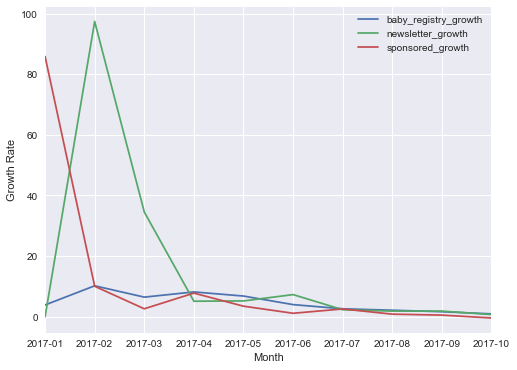

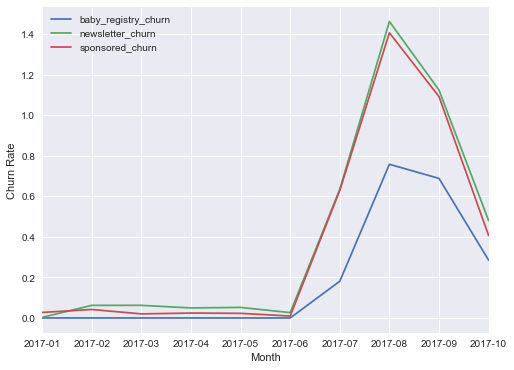

In [793]:
ax = growth_rate_baby_reg[['subscribed_at_monthyear','baby_registry_growth']].plot(figsize=(8,6))
growth_rate_newsletter[['subscribed_at_monthyear','newsletter_growth']].plot(ax=ax)
# growth_rate_pregnancy[['subscribed_at_monthyear','pregnancy_growth']].plot(ax=ax)
growth_rate_sponsored[['subscribed_at_monthyear','sponsored_growth']].plot(ax=ax)
plt.xticks(range(0,10),growth_rate_baby_reg['subscribed_at_monthyear']);
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.savefig('growth_rate.png', dpi = 300)


ax2 = growth_rate_baby_reg[['subscribed_at_monthyear','baby_registry_churn']].plot(figsize=(8,6))
growth_rate_newsletter[['subscribed_at_monthyear','newsletter_churn']].plot(ax=ax2)
# growth_rate_pregnancy[['subscribed_at_monthyear','pregnancy_churn']].plot(ax=ax)
growth_rate_sponsored[['subscribed_at_monthyear','sponsored_churn']].plot(ax=ax2)
plt.xticks(range(0,10),growth_rate_baby_reg['subscribed_at_monthyear']);
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.savefig('churn_rate.png', dpi = 300)

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


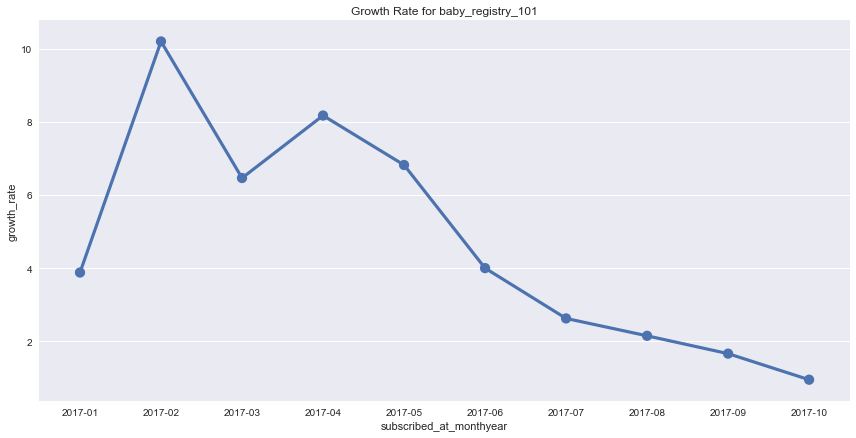

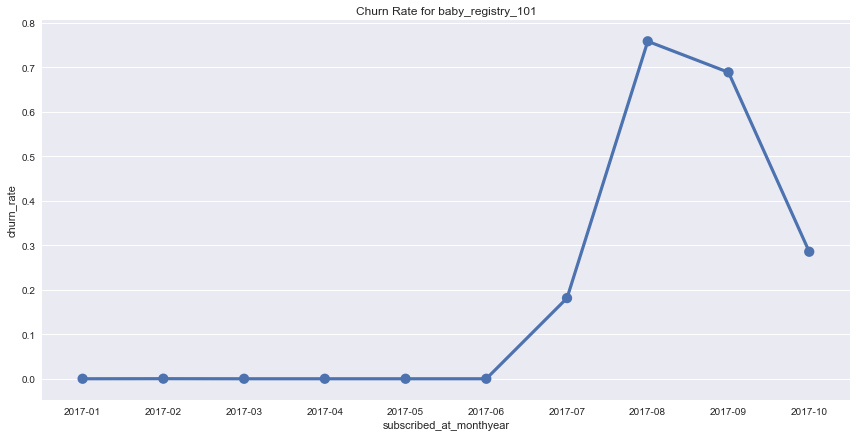

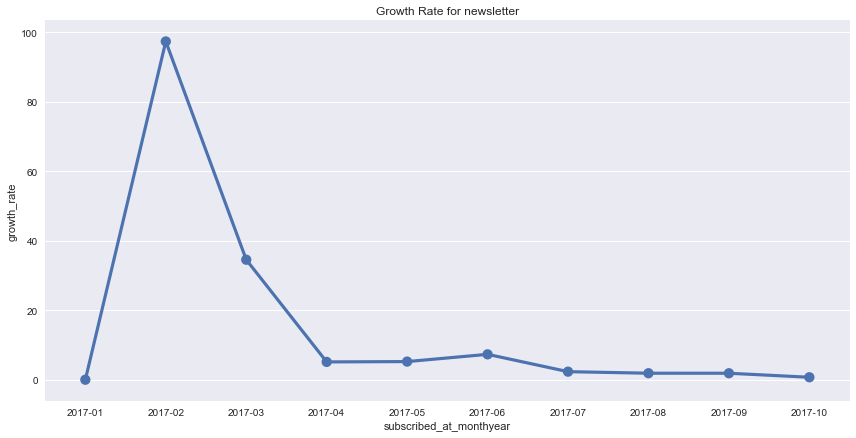

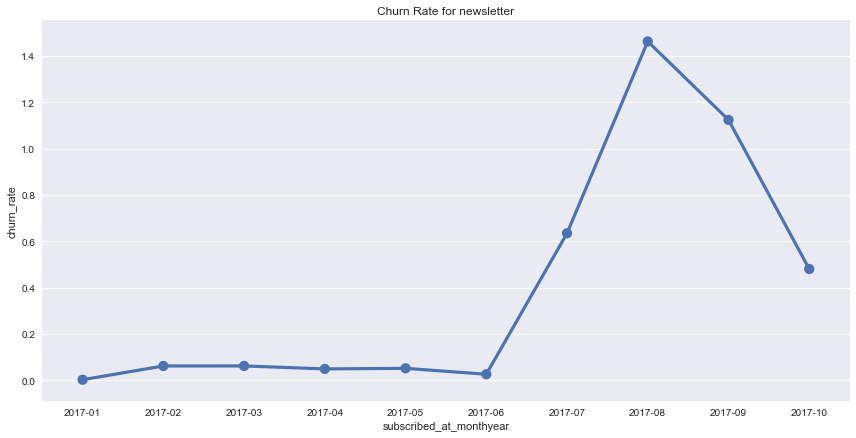

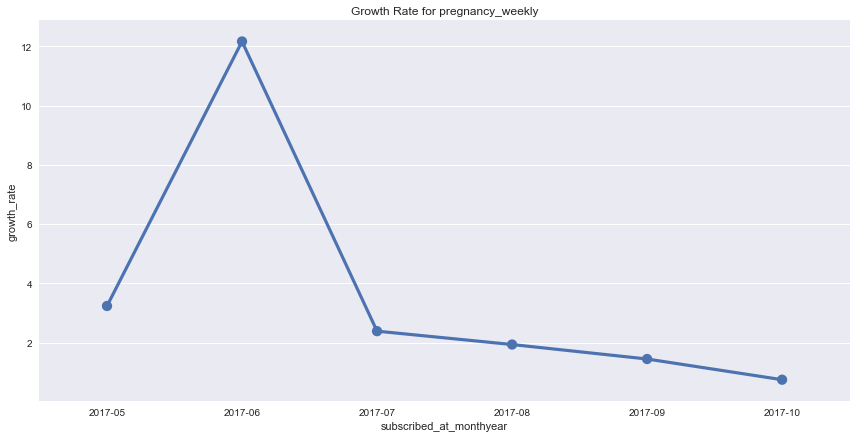

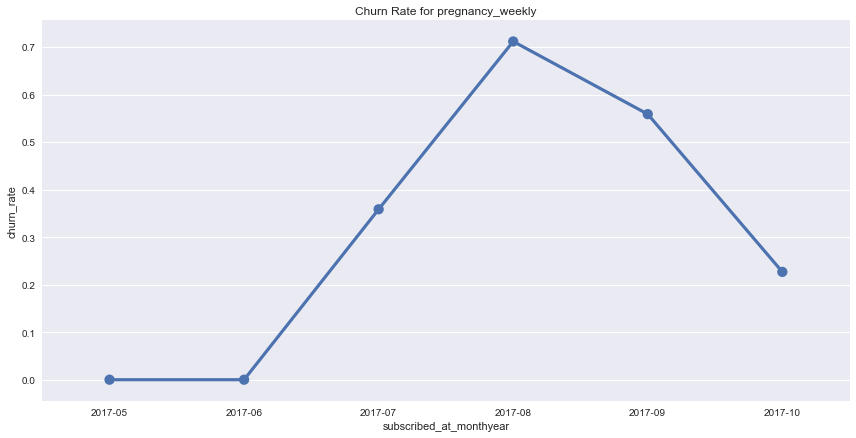

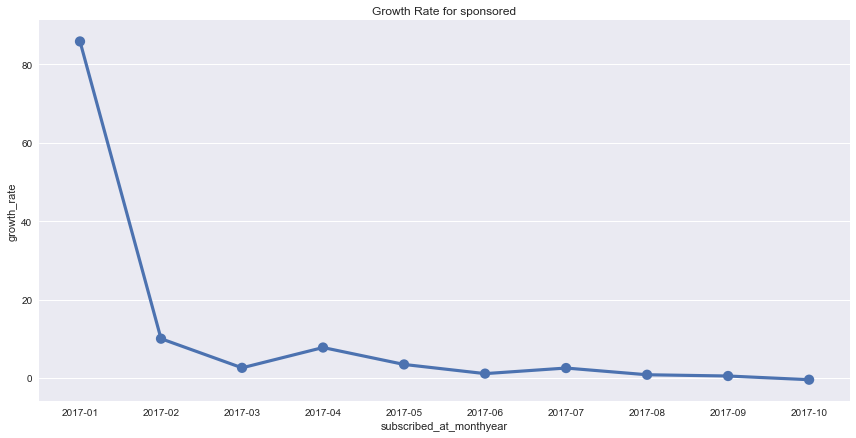

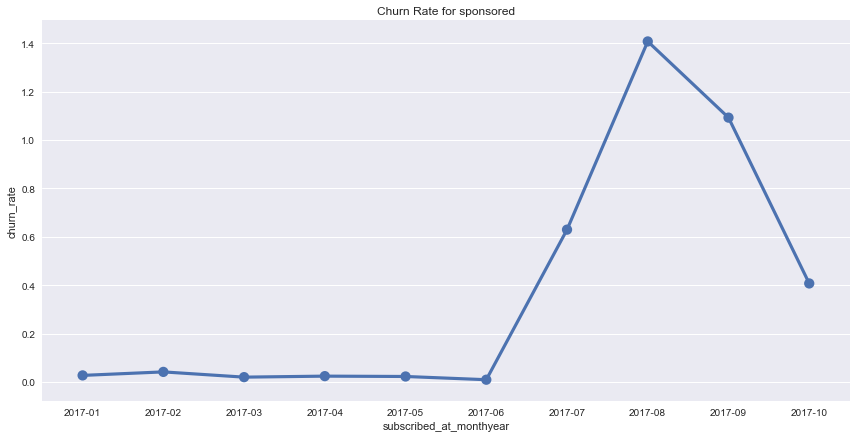

In [23]:
for email_type in types_of_emails:
    growth_rate = growth_rate_email_data(email_type,df,rolling_email_counts_2017)

## Question 3- What is the average lifetime of an email user (how long do they receive at least one of our email series)? Does that vary by referrer?

In [24]:
df['is_subscriber_baby_registry_101'] = df['baby_registry_101_delivered'].apply(lambda x: 1 if x != 0 else 0)
df['is_subscriber_newsletter'] = df['newsletter_delivered'].apply(lambda x: 1 if x != 0 else 0)
df['is_subscriber_pregnancy_weekly'] = df['pregnancy_weekly_delivered'].apply(lambda x: 1 if x != 0 else 0)
df['is_subscriber_sponsored'] = df['sponsored_delivered'].apply(lambda x: 1 if x != 0 else 0)

In [25]:
df.head()

,id,created_at,email,original_arrival_date,referrer,registry_created_at,source,updated_at,baby_registry_101_subscribed_at,newsletter_subscribed_at,...,transactional_delivered,transactional_open,transactional_click,transactional_last_open_at,is_active,created_at_monthyear,is_subscriber_baby_registry_101,is_subscriber_newsletter,is_subscriber_pregnancy_weekly,is_subscriber_sponsored
0,1,2010-11-19 17:59:24,user-1@babylist.com,2017-02-16 00:00:00,None,NaT,registry,2017-10-17 21:54:05,2017-05-21 21:21:26,2017-04-07 00:00:39,...,401,285,19,2017-10-17 05:00:14,1.0,2010-11-01,1,1,1,1
1,2,2010-12-17 00:37:28,user-2@babylist.com,2017-05-08 00:00:00,None,NaT,registry,2017-10-17 21:54:05,NaT,2017-02-03 00:00:37,...,52,30,2,2017-10-10 04:14:25,1.0,2010-12-01,0,1,0,1
2,3,2010-12-18 17:48:23,user-3@babylist.com,None,None,NaT,None,2017-10-17 21:54:05,NaT,NaT,...,0,0,0,NaT,NaN,2010-12-01,0,0,0,0
3,4,2010-12-20 17:32:17,user-4@babylist.com,None,None,NaT,None,2017-10-17 21:54:05,NaT,NaT,...,0,0,0,NaT,NaN,2010-12-01,0,0,0,0
4,5,2010-12-20 17:33:25,user-5@babylist.com,None,None,NaT,None,2017-10-17 21:54:05,NaT,NaT,...,0,0,0,NaT,NaN,2010-12-01,0,0,0,0


In [26]:
def lifetime(x,email_type):
    '''Calculating the lifetime of a series- by subtracting the 
    subscription date from the unsubscribe date.If the dates dont exist, 
    then take the Jan 01, 2017 to be the subscribe date 
    and Oct 18, 2017 to be the last date '''
    if not pd.isnull(x[email_type+'_subscribed_at']):
        if not pd.isnull(x[email_type+'_unsubscribe_at']):
            return x[email_type+'_unsubscribe_at'].date() -  x[email_type+'_subscribed_at'].date()
        else:
            return dt.date(2017,10,18) - x[email_type+'_subscribed_at'].date()
    elif x['is_subscriber_'+email_type] != 0:
        if not pd.isnull(x[email_type+'_unsubscribe_at']):
            return x[email_type+'_unsubscribe_at'].date() -  dt.date(2017,1,1)
        else:
            return dt.date(2017,10,18) - dt.date(2017,1,1)
    else:
        return np.timedelta64(0,'D')

In [27]:
for email_type in types_of_emails:    
    df['lifetime_'+email_type] = df.apply(lambda x: lifetime(x,email_type), axis= 1)

In [28]:
df.head()

,id,created_at,email,original_arrival_date,referrer,registry_created_at,source,updated_at,baby_registry_101_subscribed_at,newsletter_subscribed_at,...,is_active,created_at_monthyear,is_subscriber_baby_registry_101,is_subscriber_newsletter,is_subscriber_pregnancy_weekly,is_subscriber_sponsored,lifetime_baby_registry_101,lifetime_newsletter,lifetime_pregnancy_weekly,lifetime_sponsored
0,1,2010-11-19 17:59:24,user-1@babylist.com,2017-02-16 00:00:00,None,NaT,registry,2017-10-17 21:54:05,2017-05-21 21:21:26,2017-04-07 00:00:39,...,1.0,2010-11-01,1,1,1,1,150 days,194 days,152 days,194 days
1,2,2010-12-17 00:37:28,user-2@babylist.com,2017-05-08 00:00:00,None,NaT,registry,2017-10-17 21:54:05,NaT,2017-02-03 00:00:37,...,1.0,2010-12-01,0,1,0,1,0 days,257 days,0 days,260 days
2,3,2010-12-18 17:48:23,user-3@babylist.com,None,None,NaT,None,2017-10-17 21:54:05,NaT,NaT,...,NaN,2010-12-01,0,0,0,0,0 days,0 days,0 days,0 days
3,4,2010-12-20 17:32:17,user-4@babylist.com,None,None,NaT,None,2017-10-17 21:54:05,NaT,NaT,...,NaN,2010-12-01,0,0,0,0,0 days,0 days,0 days,0 days
4,5,2010-12-20 17:33:25,user-5@babylist.com,None,None,NaT,None,2017-10-17 21:54:05,NaT,NaT,...,NaN,2010-12-01,0,0,0,0,0 days,0 days,0 days,0 days


In [510]:
def lifetime_pregnancy(x,email_type):
    '''Calculating the lifetime of the pregnancy weekly series by subtracting the 
    subscription date from the unsubscribe date.If the dates dont exist, 
    then take the May 01, 2017 to be the subscribe date 
    and Oct 18, 2017 to be the last date '''
    if not pd.isnull(x[email_type+'_subscribed_at']):
        if not pd.isnull(x[email_type+'_unsubscribe_at']):
            return x[email_type+'_unsubscribe_at'].date() -  x[email_type+'_subscribed_at'].date()
        else:
            return dt.date(2017,10,18) - x[email_type+'_subscribed_at'].date()
    elif x['is_subscriber_'+email_type] != 0:
        if not pd.isnull(x[email_type+'_unsubscribe_at']):
            return x[email_type+'_unsubscribe_at'].date() -  dt.date(2017,5,1)
        else:
            return dt.date(2017,10,18) - dt.date(2017,5,1)
    else:
        return np.timedelta64(0,'D')

In [509]:
data_since_may = df.loc[df.created_at > dt.datetime(2017,4,30,23,59,59)].reset_index()
data_since_may.drop('index',axis=1,inplace=True)

In [512]:
data_since_may['lifetime_pregnancy_weekly'] = data_since_may.apply(lambda x: lifetime_pregnancy(x,types_of_emails[2]), axis= 1)

In [513]:
data_since_may['lifetime_pregnancy_weekly'] = data_since_may.lifetime_pregnancy_weekly.apply(lambda x: x/np.timedelta64(1,'D'))

In [30]:
#Converting timedelta to float for ease of calculations
df[['lifetime_baby_registry_101', 'lifetime_newsletter','lifetime_pregnancy_weekly', 'lifetime_sponsored']] = \
    df[['lifetime_baby_registry_101', 'lifetime_newsletter','lifetime_pregnancy_weekly', 'lifetime_sponsored']].\
    apply(lambda x: x/np.timedelta64(1,'D'))

### Average lifetime for each email series

In [605]:
df.groupby('is_subscriber_baby_registry_101')['lifetime_baby_registry_101'].mean()

is_subscriber_baby_registry_101
0      0.000000
1    143.324642
Name: lifetime_baby_registry_101, dtype: float64

In [606]:
df.groupby('is_subscriber_newsletter')['lifetime_newsletter'].mean()

is_subscriber_newsletter
0      0.000000
1    200.459824
Name: lifetime_newsletter, dtype: float64

In [607]:
data_since_may.groupby('is_subscriber_pregnancy_weekly')['lifetime_pregnancy_weekly'].mean()

is_subscriber_pregnancy_weekly
0     0.000000
1    90.274064
Name: lifetime_pregnancy_weekly, dtype: float64

In [608]:
df.groupby('is_subscriber_sponsored')['lifetime_sponsored'].mean()

is_subscriber_sponsored
0      0.000000
1    220.883769
Name: lifetime_sponsored, dtype: float64

### Average lifetime across all email series
Caluclated by finding the maximum lifetime across all the email series lifetime

In [36]:
df['total_lifetime'] = df[['lifetime_baby_registry_101', 'lifetime_newsletter','lifetime_pregnancy_weekly', \
                           'lifetime_sponsored']].max(axis=1) 

In [611]:
def subscriber_flag(x):
    if x['is_subscriber_baby_registry_101'] or x['is_subscriber_newsletter'] or\
       x['is_subscriber_pregnancy_weekly'] or x['is_subscriber_sponsored']:
        return 1
    else:
        return 0
        

In [612]:
df['is_atleast_1_email_subscriber'] = df.apply(lambda x: subscriber_flag(x), axis = 1)

In [686]:
mean_lifetime = df.groupby('is_atleast_1_email_subscriber')['total_lifetime'].mean().max()

In [687]:
mean_lifetime

208.31801910387375

Checking if the referrer affects the lifetime

In [38]:
df.referrer.nunique()

599

In [642]:
referrer_lifetime = df.groupby(['referrer','is_atleast_1_email_subscriber'])['total_lifetime'].mean().reset_index()

In [ ]:
f = df.groupby(['referrer','is_atleast_1_email_subscriber'])['total_lifetime'].agg({'mean','count'}).reset_index()
f = f.loc[f.is_atleast_1_email_subscriber==1]
f.drop('is_atleast_1_email_subscriber',axis=1,inplace=True)

In [683]:
f.rename(columns={'mean':'mean_total_lifetime','count':'subscribers'},inplace=True)
f.sort_values(by='subscribers',ascending=False).head(10)

,referrer,mean_total_lifetime,subscribers
466,www.google.com,92.900120,59291
665,www.pinterest.com,57.661410,37727
186,m.facebook.com,77.868139,9146
413,www.facebook.com,74.891155,6422
438,www.google.ca,97.278328,3230
61,com.google.android.googlequicksearchbox,82.359740,1540
377,www.bing.com,102.306991,1316
162,l.facebook.com,85.568161,1093
650,www.oviahealth.com,113.219466,1048
459,www.google.co.uk,91.456140,855


In [646]:
referrer_lifetime = referrer_lifetime.loc[referrer_lifetime.is_atleast_1_email_subscriber == 1]

In [648]:
referrer_lifetime.drop('is_atleast_1_email_subscriber',axis=1, inplace=True)

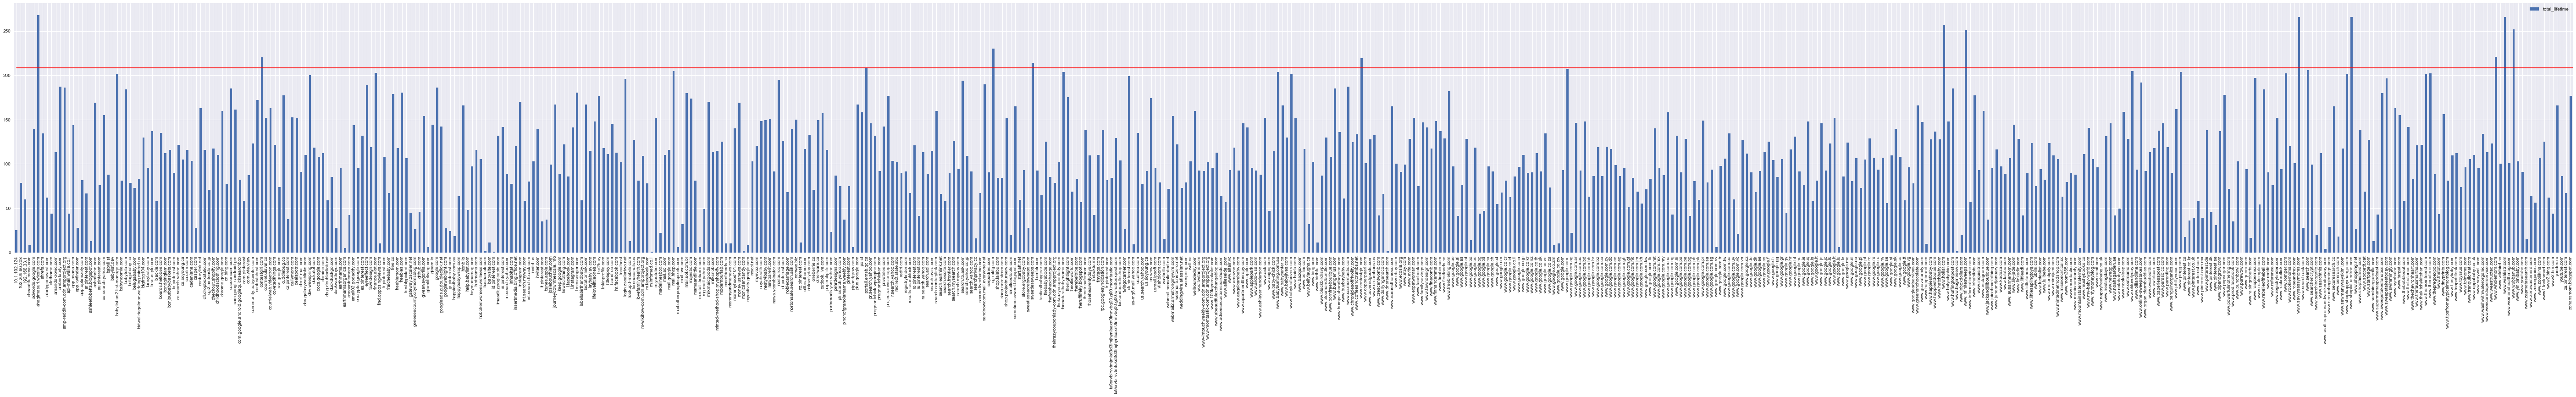

In [655]:
#double click on plot to zoom
referrer_lifetime.plot(kind='bar',figsize=(100,10))
vec1 = np.ones(600)
plt.plot(mean_lifetime*vec1,'r') #The red line represents the mean lifetime
plt.xticks(range(0,referrer_lifetime.referrer.nunique()),referrer_lifetime['referrer']);

In [658]:
referrer_lifetime.sort_values(by= 'total_lifetime',ascending=False).head(10)

,referrer,total_lifetime
6,ahagimasuri.wixsite.com,268.000000
692,www.savvysassymoms.com,266.000000
748,www.wishlistr.com,266.000000
706,www.shopluluandroo.com,266.000000
587,www.hollar.com,257.000000
751,www.wubbanub.com,252.000000
592,www.infinitesweeps.com,251.000000
286,sg-mktg.com,230.333333
745,www.wholemom.com,221.000000
68,contestgirl.com,220.333333


Source lifetime

In [659]:
source_lifetime = df.groupby(['source','is_atleast_1_email_subscriber'])['total_lifetime'].mean().reset_index()

In [662]:
source_lifetime = source_lifetime.loc[source_lifetime.is_atleast_1_email_subscriber == 1]
source_lifetime.drop('is_atleast_1_email_subscriber',axis=1, inplace=True)

In [663]:
source_lifetime

,source,total_lifetime
1,checklist,201.738781
3,email:newsletter:widget,12.964744
5,email:pregnancy:direct,52.604400
7,email:pregnancy:widget,13.346405
9,event,10.894545
11,giveaway,223.776430
13,registry,208.582572


## Question 4- What factors contribute to churn?

In [43]:
def open_rate(x,email_type):
    '''Calculating open rate of emails- no of emails opened by no of emails delivered'''
    if x[email_type+'_delivered'] != 0:
        return x[email_type+'_open']/x[email_type+'_delivered']
    else:
        return 0

def ctr(x,email_type):
    '''Calculating ctr- no of emails clicked on by no of emails delivered'''
    if x[email_type+'_delivered'] != 0:
        return x[email_type+'_click']/x[email_type+'_delivered']
    else:
        return 0
    
def duedate_diff(x,email_type):
    '''Calculating the difference between the due date and the unsubscribe date'''
    if (not (pd.isnull(x['original_arrival_date']))) & (not (pd.isnull(x[email_type+'_unsubscribe_at']))):
            return x[email_type+'_unsubscribe_at'].date() - x['original_arrival_date'].date()
    else:
        return np.timedelta64(0,'D')

# def day_since_last_open(x,email_type):
#     '''Calculate the difference between the last open at date and the Oct 18 2017- to check for unengaged users'''
#     if x[email_type+'_open'] != 0:
#         return dt.date(2017,10,18) - x[email_type+'_last_open_at'].date()
#     else:
#         return np.timedelta64(0,'D')
    
def is_churn(x,email_type):
    '''Flag for churned users'''
    if not pd.isnull(x[email_type+'_unsubscribe_at']):
        return 1
    else:
        return 0

def days_between_emails(x,email_type):
    if x[email_type+'_delivered'] != 0:
        return x['lifetime_'+email_type]/x[email_type+'_delivered'] 
    else:
        return 0

In [45]:
for email_type in types_of_emails:
    df[email_type+'_due_date_unsubscribe_date_diff'] = df.apply(lambda x: duedate_diff(x,email_type),axis=1)
    df[email_type+'_due_date_unsubscribe_date_diff'] = df[email_type+'_due_date_unsubscribe_date_diff'].\
                                                    apply(lambda x: x/np.timedelta64(1,'D'))
    df[email_type+'_open_rate'] = df.apply(lambda x: open_rate(x,email_type),axis=1)
    df[email_type+'_CTR'] = df.apply(lambda x: ctr(x,email_type),axis=1)
    df[email_type+'_is_churn_before_due_date'] = df[email_type+'_due_date_unsubscribe_date_diff']\
                                        .apply(lambda x: 1 if x < 0 else 0)
#     df[email_type+'_days_since_last_open'] = df.apply(lambda x: day_since_last_open(x,email_type),axis=1)
    df[email_type+'_is_churn'] = df.apply(lambda x: is_churn(x,email_type),axis=1)
    df[email_type+'_days_between_emails'] = df.apply(lambda x: days_between_emails(x,email_type),axis=1)
    df[email_type+'_days_since_last_open'] = df[email_type+'_days_since_last_open'].apply(lambda x: x/np.timedelta64(1,'D'))

In [48]:
df.is_active.fillna(0,inplace=True)

In [51]:
df.baby_registry_101_days_since_last_open.max()

273.0

We want to check if unengaged users are leaving the email lists. So adding a flag to check for users who last opened the emails more than 2 months ago (since the email lists started earlier this year)

In [52]:
#adding unegaged users flag- not opened a Babylist email for more than 60 days
for email_type in types_of_emails:
    df[email_type+'_is_unengaged'] = df[email_type+'_days_since_last_open'].apply(lambda x: 1 if x > 60 else 0)

In [54]:
#Helper function
def pr_curve(truthvec, scorevec, digit_prec=2):
    '''Function to plot the precision recall curve of the classifier'''
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(recallvec,precisionvec)
    plt.title('PR curve')
    plt.xlabel('recall')
    plt.ylabel('precision')
#     plt.legend(loc='best')
    plt.axis([0, 1, 0, 1])
    return (recallvec, precisionvec, threshvec)

Since the tracking of the delivers, clicks and opens began in Feb, for the churn reason analysis, I have only considered the accounts that came into the system from Feb 1 onwards

In [515]:
data_since_feb = df.loc[df.created_at > dt.datetime(2017,1,31,23,59,59)].reset_index()
data_since_feb.drop('index',axis=1,inplace=True)

In [778]:
def churn_factors(df,email_type):
#     new_df = df.loc[df['is_subscriber_'+email_type]==1]
    X = df[['source', #email_type+'_due_date_unsubscribe_date_diff',
       email_type+'_open_rate', email_type+'_CTR',
       email_type+'_is_churn_before_due_date',
#        email_type+'_days_since_last_open',
           'lifetime_'+email_type,email_type+'_days_between_emails','is_active']]#,email_type+'_is_unengaged']]
    
    X = pd.get_dummies(X)
    
    y = df[email_type+'_is_churn']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
#     y_pred_prob_new_threshold = (y_pred_prob>.6).astype(int)
#     log_loss_output_new = log_loss(y_test,y_pred_prob_new_threshold)
#     print('Check log loss for new threshold ', log_loss_output_new)
#     print('Check precision for new threshold', precision_score(y_test, y_pred_prob_new_threshold))
#     print('Check recall for new threshold', recall_score(y_test, y_pred_prob_new_threshold))
    cross_val = cross_val_score(model,X,y)
    log_loss_output = log_loss(y_test,y_pred_prob)
    print('Model: Logistic Regression')
    print('Cross val score: ', np.mean(cross_val))
    print('Log loss: ',log_loss_output)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('AUC score is:', roc_auc_score(y_test,y_pred_prob))
    pr_curve(y_test, y_pred_prob)
    print()
    importance = pd.DataFrame(sorted(zip(X.columns,model.coef_[0]), key = lambda x:x[1], reverse=True))
    importance.columns = ['features','effect']
    print(importance)
    importance.plot(kind='barh')
    plt.title('Feature Effects')
    plt.xlabel('Effect')
    plt.yticks(range(0,len(X.columns)),importance.features)
    plt.figure()
    fpr, tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr, tpr)
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

Model: Logistic Regression
Cross val score:  0.993275769988
Log loss:  0.032691822575
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    199386
          1       0.98      0.68      0.80      4177

avg / total       0.99      0.99      0.99    203563

[[199341     45]
 [  1334   2843]]
AUC score is: 0.953470353651


/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()



                                      features     effect
0   baby_registry_101_is_churn_before_due_date  11.311406
1                  baby_registry_101_open_rate   2.423809
2                        baby_registry_101_CTR   2.298708
3                                 source_event   1.190814
4                                    is_active   1.172585
5                              source_registry   0.836675
6                   lifetime_baby_registry_101   0.000078
7                             source_checklist  -0.005115
8        baby_registry_101_days_between_emails  -0.038119
9                source_email:pregnancy:widget  -0.069331
10              source_email:newsletter:widget  -0.073781
11                             source_giveaway  -1.140987
12               source_email:pregnancy:direct  -2.184498


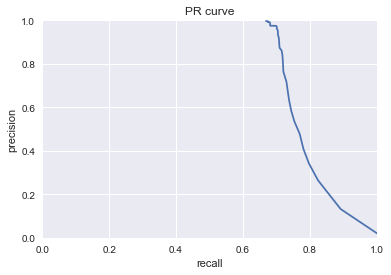

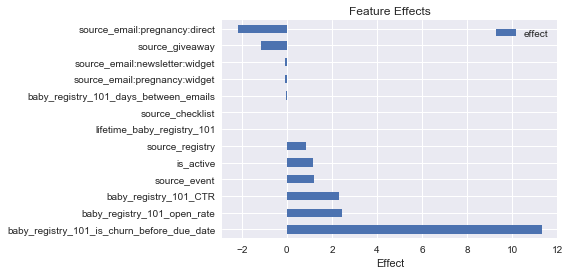

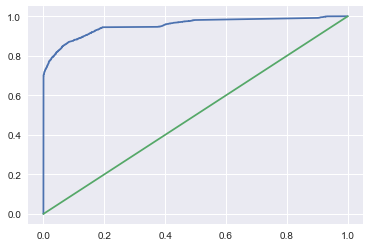

In [779]:
churn_factors(data_since_feb,types_of_emails[0])

Model: Logistic Regression
Cross val score:  0.976323702787
Log loss:  0.102467724536
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    193992
          1       1.00      0.50      0.66      9571

avg / total       0.98      0.98      0.97    203563

[[193978     14]
 [  4829   4742]]
AUC score is: 0.86792846574


/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()



                               features    effect
0   newsletter_is_churn_before_due_date  8.965152
1                  newsletter_open_rate  2.155771
2                        newsletter_CTR  0.840628
3                             is_active  0.780225
4                       source_giveaway  0.649299
5                      source_checklist  0.461637
6                       source_registry  0.362102
7                   lifetime_newsletter -0.000488
8        newsletter_days_between_emails -0.034697
9         source_email:pregnancy:widget -0.097001
10       source_email:newsletter:widget -0.130047
11                         source_event -0.331946
12        source_email:pregnancy:direct -1.575312


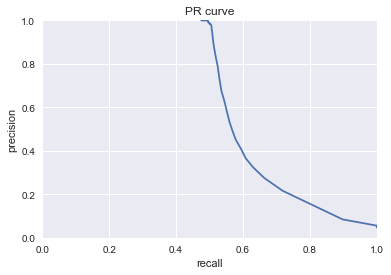

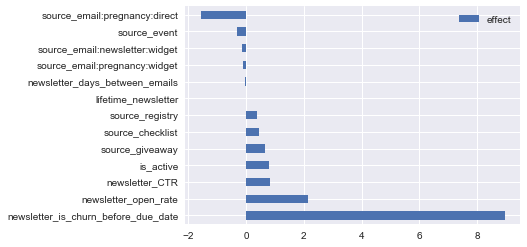

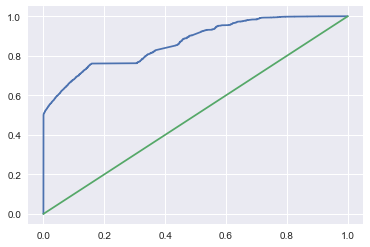

In [775]:
churn_factors(data_since_feb,types_of_emails[1])

Since the pregnancy email list began only in June, for the churn reason analysis, I have only considered the accounts that came into the system from June 1 onwards

Model: Logistic Regression
Cross val score:  0.99473951554
Log loss:  0.0295065634733
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    184000
          1       1.00      0.79      0.88      4994

avg / total       0.99      0.99      0.99    188994

[[184000      0]
 [  1039   3955]]
AUC score is: 0.973396480124


/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()



                                     features     effect
0   pregnancy_weekly_is_churn_before_due_date  12.642029
1                  pregnancy_weekly_open_rate   2.926158
2                                   is_active   0.803989
3                        pregnancy_weekly_CTR   0.417956
4                             source_giveaway   0.312557
5                            source_checklist   0.183496
6                   lifetime_pregnancy_weekly   0.007854
7        pregnancy_weekly_days_between_emails  -0.024063
8              source_email:newsletter:widget  -0.176508
9                             source_registry  -0.366998
10                               source_event  -0.436349
11              source_email:pregnancy:widget  -0.455836
12              source_email:pregnancy:direct  -1.379186


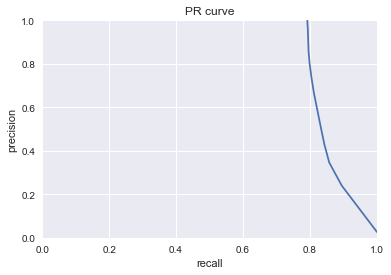

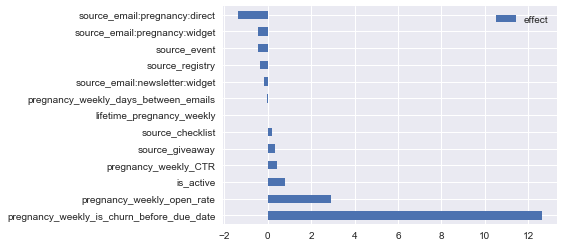

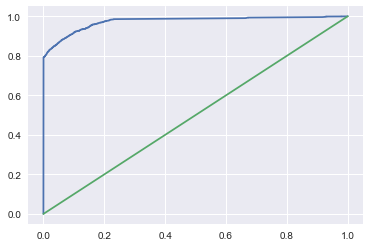

In [776]:
churn_factors(data_since_may,types_of_emails[2])

Model: Logistic Regression
Cross val score:  0.978079431817
Log loss:  0.0970976100903
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    194474
          1       0.97      0.52      0.67      9089

avg / total       0.98      0.98      0.97    203563

[[194333    141]
 [  4394   4695]]
AUC score is: 0.881515855652

                              features     effect
0   sponsored_is_churn_before_due_date  10.655544
1                        sponsored_CTR   7.343981
2                  sponsored_open_rate   1.905774
3                            is_active   1.138496
4                         source_event   0.471920
5                      source_registry   0.307254
6                      source_giveaway   0.242818
7                     source_checklist   0.144316
8                   lifetime_sponsored   0.003234
9        sponsored_days_between_emails  -0.048357
10       source_email:pregnancy:widget  -0.075424
11      source_email:newsletter:w

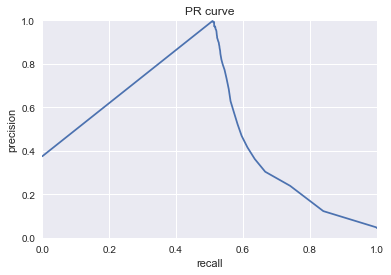

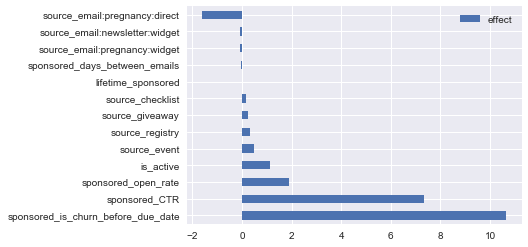

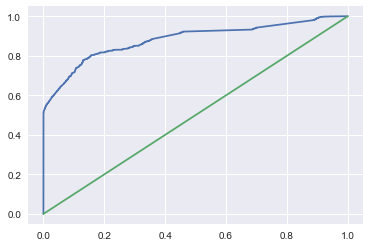

In [777]:
churn_factors(data_since_feb,types_of_emails[3])

From all of the above analysis is seems that-
* People who came in from the registry, checklist and giveaway sources churn the most- proved by the high positive coefficient.
* People who have greater lifetime churn lesser- this is obvious
* When the days between the emails is longer, the churn is lesser
* The churn is driven by those who leave before their due date
* Also those with high CTR and open rate churn more- this means that the content of the mail might not be satisfactory
* Active users are churning- no relevant content
* Could we use NLP to understand what kind of emails drove users to unsubscribe?

### Finding the average number of days before due date when the customers are churning

In [786]:
df.groupby(['baby_registry_101_is_churn_before_due_date'])\
['baby_registry_101_due_date_unsubscribe_date_diff'].mean()

baby_registry_101_is_churn_before_due_date
0      5.152540
1   -134.820656
Name: baby_registry_101_due_date_unsubscribe_date_diff, dtype: float64

In [787]:
df.groupby(['newsletter_is_churn_before_due_date'])\
['newsletter_due_date_unsubscribe_date_diff'].mean()

newsletter_is_churn_before_due_date
0      8.688904
1   -155.079901
Name: newsletter_due_date_unsubscribe_date_diff, dtype: float64

In [788]:
df.groupby(['pregnancy_weekly_is_churn_before_due_date'])\
['pregnancy_weekly_due_date_unsubscribe_date_diff'].mean()

pregnancy_weekly_is_churn_before_due_date
0      0.249106
1   -102.149768
Name: pregnancy_weekly_due_date_unsubscribe_date_diff, dtype: float64

In [789]:
df.groupby(['sponsored_is_churn_before_due_date'])\
['sponsored_due_date_unsubscribe_date_diff'].mean()

sponsored_is_churn_before_due_date
0     10.139810
1   -150.477305
Name: sponsored_due_date_unsubscribe_date_diff, dtype: float64

The average time before due date that the subscriber left- 3 to 5 months before due date

# Question 5 & 6- What's our best and worst cohort?

In [196]:
def growth_rate_source_email_data(email_type,df,rolling_email_counts_2017):
    email_data = df[['email','created_at','referrer', 'registry_created_at', 'source', 'updated_at',\
                        email_type+'_subscribed_at', email_type+'_delivered', \
                        email_type+'_open',email_type+'_click', email_type+'_last_open_at',
                        email_type+'_unsubscribe_at','is_subscriber_'+email_type,'is_active',\
                    'lifetime_'+email_type,email_type+'_due_date_unsubscribe_date_diff',
       email_type+'_open_rate', email_type+'_CTR',
       email_type+'_is_churn_before_due_date',email_type+'_days_since_last_open', email_type+'_is_churn',
       email_type+'_days_between_emails',email_type+'_is_unengaged']]
#     email_data['subscribed_at_date'] = email_data[email_type+'_subscribed_at'].dt.date
    email_data['subscribed_at_monthyear'] = email_data[email_type+'_subscribed_at'].\
                apply(lambda x: x.strftime('%Y-%m')if not pd.isnull(x) else '')
    email_data['unsubscribed_at_monthyear'] = email_data[email_type+'_unsubscribe_at'].\
                apply(lambda x: x.strftime('%Y-%m')if not pd.isnull(x) else '')

    subscribe_data = email_data.groupby(['subscribed_at_monthyear','source'])['email'].count().reset_index()
    subscribe_data.drop(subscribe_data.head(7).index,axis=0,inplace=True)
    unsubscribe_data = email_data.groupby(['unsubscribed_at_monthyear','source'])['email'].count().reset_index()
    unsubscribe_data.drop(unsubscribe_data.head(7).index,axis=0,inplace=True)
    calculate_growth_rate = pd.merge(subscribe_data,unsubscribe_data,how='left',left_on=\
                    ['source','subscribed_at_monthyear'],right_on=['source','unsubscribed_at_monthyear'])
    calculate_growth_rate = calculate_growth_rate.merge(rolling_email_counts_2017,how='left', left_on='subscribed_at_monthyear',\
                              right_on='created_at_monthyear')
    calculate_growth_rate.fillna(0,inplace=True)
    calculate_growth_rate['growth_rate'] = 100*(calculate_growth_rate.email_x - \
                                                calculate_growth_rate.email_y)/calculate_growth_rate.total_email
    calculate_growth_rate['churn_rate'] = 100*(calculate_growth_rate.email_y)/calculate_growth_rate.total_email
    sns.factorplot(x='subscribed_at_monthyear',y='growth_rate',data=calculate_growth_rate,hue='source',size=6,aspect=2)
    plt.title('Growth rate- source-wise '+email_type)
    sns.factorplot(x='subscribed_at_monthyear',y='churn_rate',data=calculate_growth_rate,hue='source',size=6,aspect=2)
    plt.title('Churn rate- source-wise '+email_type)
    return email_data, calculate_growth_rate

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


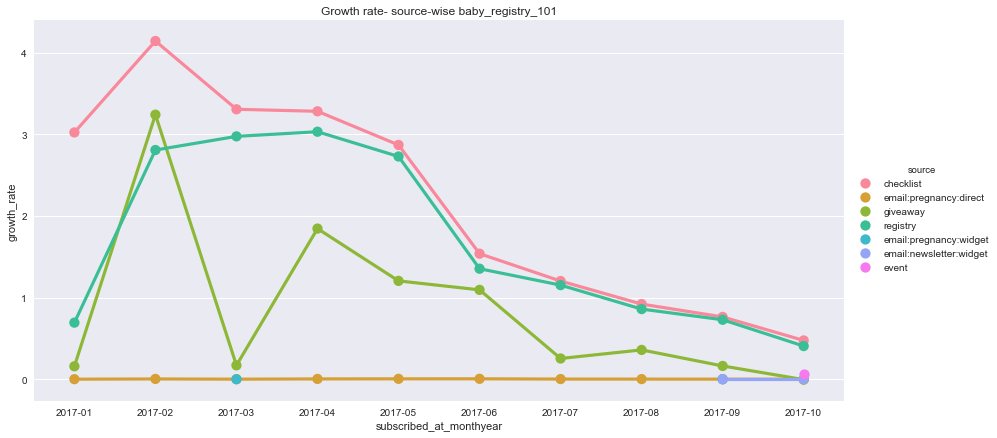

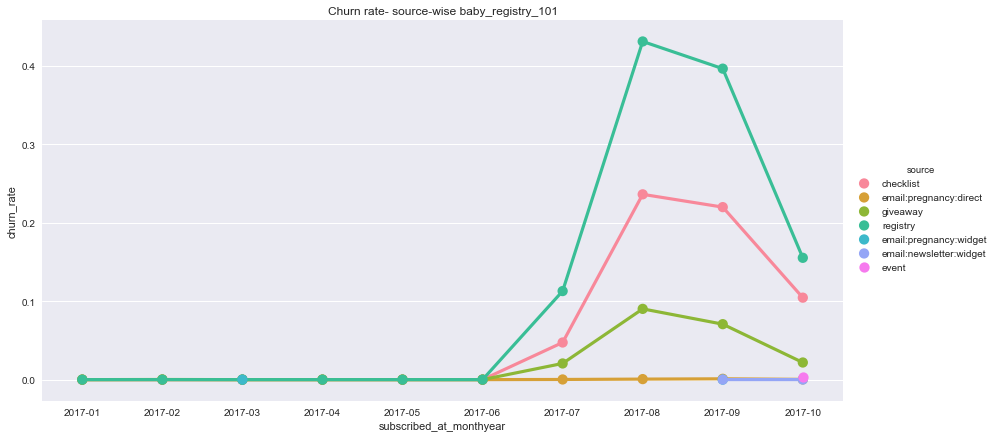

In [546]:
baby_registry_data, growth_rate_baby_reg = growth_rate_source_email_data(types_of_emails[0],df,rolling_email_counts_2017)

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


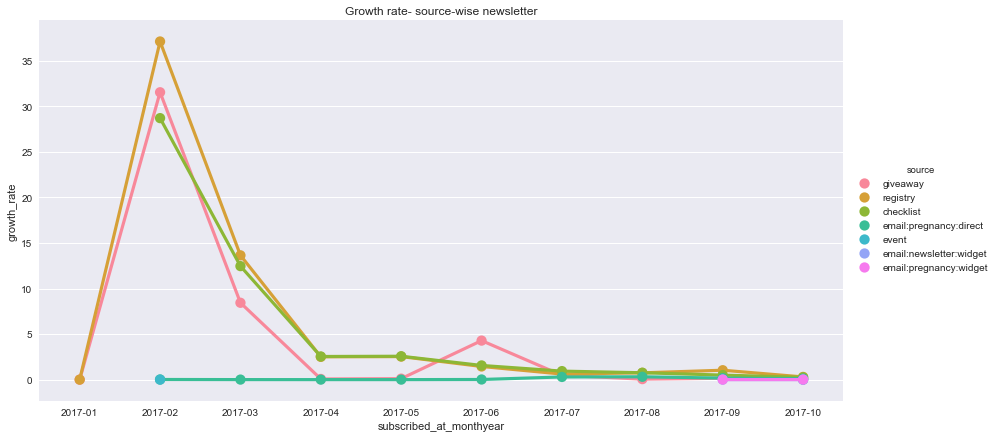

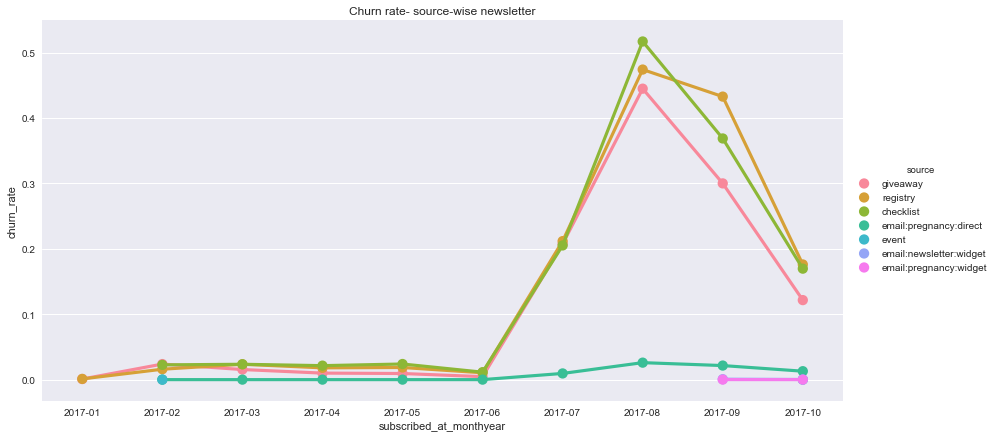

In [547]:
newsletter_data, growth_rate_newsletter = growth_rate_source_email_data(types_of_emails[1],df,rolling_email_counts_2017)

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


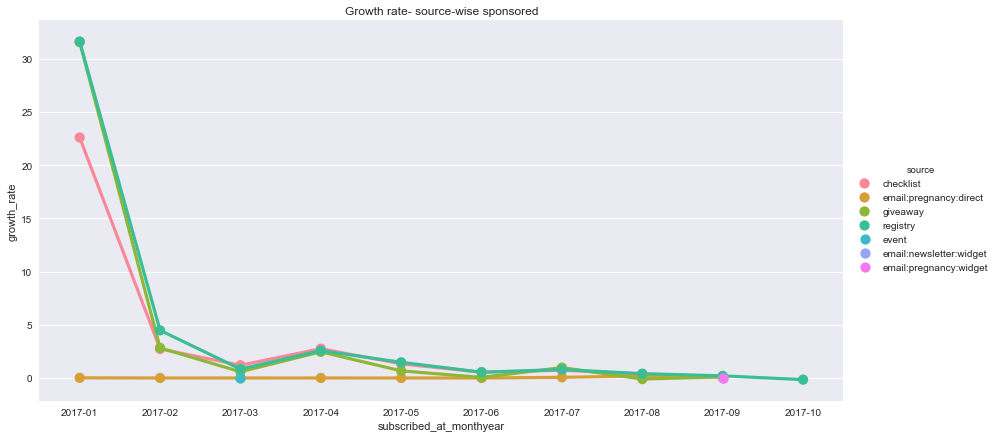

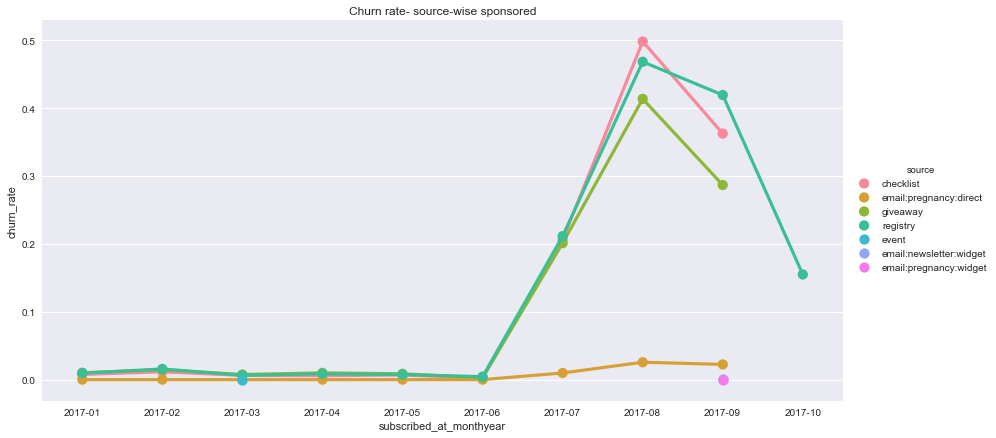

In [548]:
sponsored_data, growth_rate_sponsored = growth_rate_source_email_data(types_of_emails[3],df,rolling_email_counts_2017)

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


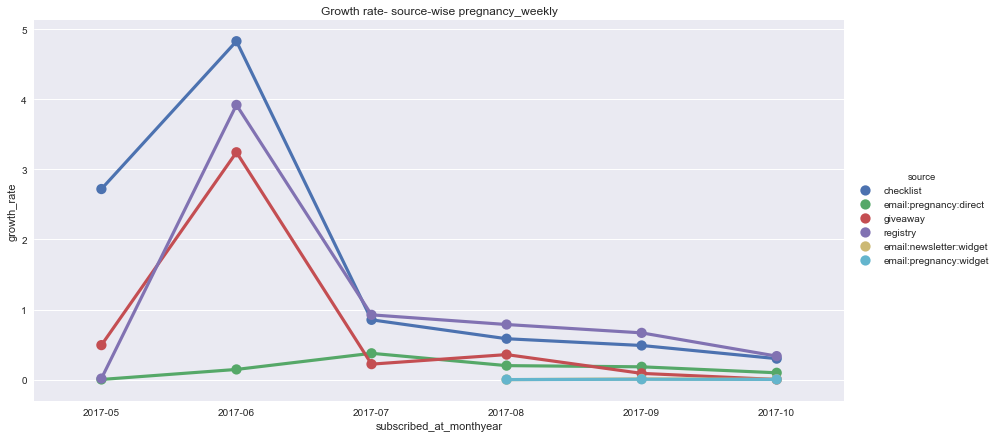

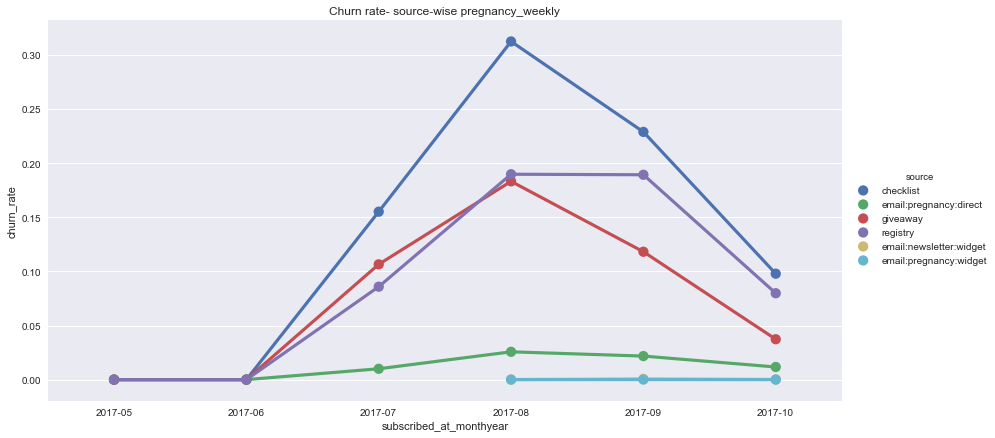

In [549]:
pregnancy_data, growth_rate_pregnancy = growth_rate_source_email_data(types_of_emails[2],df,rolling_email_counts_2017)

In [531]:
# for email_type in types_of_emails:
#     growth_rate = growth_rate_source_email_data(email_type,df,rolling_email_counts_2017)

In [533]:
data_since_feb.groupby('source')['baby_registry_101_open','newsletter_open','sponsored_open'].sum()

,baby_registry_101_open,newsletter_open,sponsored_open
source,,,
checklist,324400,872260,515903
email:newsletter:widget,8,279,9
email:pregnancy:direct,777,30318,14989
email:pregnancy:widget,7,140,10
event,946,0,0
giveaway,144084,1004097,745375
registry,398536,478083,281341


In [536]:
#source-wise open rate for pregnancy weekly
data_since_may.groupby('source')['pregnancy_weekly_open'].sum()

source
checklist                  321793
email:newsletter:widget       315
email:pregnancy:direct      53930
email:pregnancy:widget        220
event                           0
giveaway                   165136
registry                   220276
Name: pregnancy_weekly_open, dtype: int64

In [ ]:
#Email lists lifetime comparison:

In [537]:
baby_reg_overall_open_rate = data_since_feb.baby_registry_101_open.sum()/data_since_feb.baby_registry_101_delivered.sum()
newsletter_overall_open_rate = data_since_feb.newsletter_open.sum()/data_since_feb.newsletter_delivered.sum()
pregnancy_overall_open_rate = data_since_may.pregnancy_weekly_open.sum()/data_since_june.pregnancy_weekly_delivered.sum()
sponsored_overall_open_rate = data_since_feb.sponsored_open.sum()/data_since_feb.sponsored_delivered.sum()

In [690]:
print('Overall Baby Registry Open Rate(%): ', baby_reg_overall_open_rate*100)
print('Overall Newsletter Open Rate(%): ', newsletter_overall_open_rate*100)
print('Overall Pregnancy Weekly Open Rate(%): ', pregnancy_overall_open_rate*100)
print('Overall Sponsored Open Rate(%): ', sponsored_overall_open_rate*100)

Overall Baby Registry Open Rate(%):  23.5533951024
Overall Newsletter Open Rate(%):  16.2007151771
Overall Pregnancy Weekly Open Rate(%):  31.7597004609
Overall Sponsored Open Rate(%):  18.2268585435


In [539]:
baby_reg_overall_CTR = data_since_feb.baby_registry_101_click.sum()/data_since_feb.baby_registry_101_delivered.sum()
newsletter_overall_CTR = data_since_feb.newsletter_click.sum()/data_since_feb.newsletter_delivered.sum()
pregnancy_overall_CTR = data_since_may.pregnancy_weekly_click.sum()/data_since_may.pregnancy_weekly_delivered.sum()
sponsored_overall_CTR = data_since_feb.sponsored_click.sum()/data_since_feb.sponsored_delivered.sum()

In [691]:
print('Overall Baby Registry CTR(%): ', baby_reg_overall_CTR*100)
print('Overall Newsletter CTR(%): ', newsletter_overall_CTR*100)
print('Overall Pregnancy CTR(%): ', pregnancy_overall_CTR*100)
print('Overall Sponsored CTR(%): ', sponsored_overall_CTR*100)

Overall Baby Registry CTR(%):  3.1184557867
Overall Newsletter CTR(%):  4.48086880572
Overall Pregnancy CTR(%):  7.53469758158
Overall Sponsored CTR(%):  0.884658742744


Best cohort in terms of open rate and CTR is the Pregnancy email list. 

In [798]:
def monthly_cohort_retention(data,email_type):
    '''Function for finding monthly user retention rate and overall open rate and CTR'''
    
    data['subscribed_month_group'] = data[email_type+'_subscribed_at'].dt.month
    data['unsubscribed_month_group'] = data[email_type+'_unsubscribe_at'].dt.month
    
    f = {'email':'count',email_type+'_delivered':'sum',email_type+'_open':'sum',email_type+'_click':'sum'}
    overall_metrics = data.groupby('subscribed_month_group')['email',email_type+'_delivered',\
                                email_type+'_open',email_type+'_click'].agg(f).reset_index()
    
    overall_metrics['open_rate'] = overall_metrics[email_type+'_open']/overall_metrics[email_type+'_delivered']
    overall_metrics['CTR'] = overall_metrics[email_type+'_click']/overall_metrics[email_type+'_delivered']

    print(overall_metrics[['subscribed_month_group','open_rate','CTR']])
    
    cohorts = data.groupby(['subscribed_month_group', 'unsubscribed_month_group'])\
    ['email'].count().groupby(level=[0]).cumsum().reset_index()
    cohorts.set_index(['subscribed_month_group', 'unsubscribed_month_group'], inplace=True)
    cohort_group_size = data.groupby('subscribed_month_group')['email'].count()
    user_retention = -cohorts['email'].unstack(0).subtract(cohort_group_size, axis=1)
#     user_retention = user_retention.reindex(range(int(data.subscribed_month_group.min()),11), fill_value=np.nan)
    user_retention = user_retention.reindex(range(6,11), fill_value=np.nan)
    user_retention.fillna(cohort_group_size,axis=0,inplace=True)
    user_retention = user_retention.divide(cohort_group_size,axis=1)*100
    user_retention = user_retention.where(np.tril(np.ones(user_retention.shape)).astype(np.bool))
#     plt.figure(figsize=(15,10))
    user_retention.plot(figsize=(8,6))
    plt.title('Retention rate for '+email_type)
    plt.xlabel('Month')
    plt.ylabel('Retention Rate')
    plt.savefig(email_type+'retention_rate.png', dpi = 300)
    return user_retention

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


   subscribed_month_group  open_rate       CTR
0                     1.0   0.258773  0.032104
1                     2.0   0.286640  0.036246
2                     3.0   0.266595  0.037871
3                     4.0   0.244405  0.030338
4                     5.0   0.235719  0.028753
5                     6.0   0.219455  0.026036
6                     7.0   0.231693  0.029188
7                     8.0   0.217044  0.032122
8                     9.0   0.198031  0.033333
9                    10.0   0.183272  0.032818


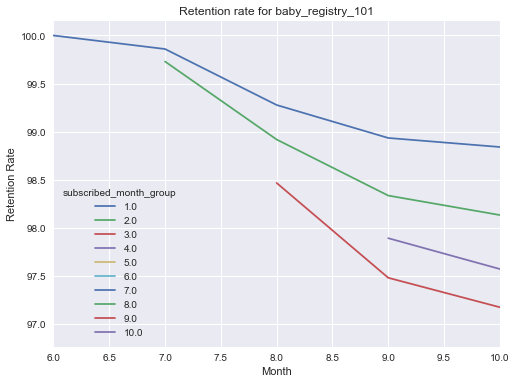

In [799]:
user_retention_baby_registry = monthly_cohort_retention(baby_registry_data,types_of_emails[0])

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


   subscribed_month_group  open_rate       CTR
0                     1.0   0.413793  0.051724
1                     2.0   0.153455  0.044536
2                     3.0   0.173404  0.050360
3                     4.0   0.200940  0.054536
4                     5.0   0.207601  0.060341
5                     6.0   0.197509  0.057928
6                     7.0   0.198294  0.064762
7                     8.0   0.202841  0.068984
8                     9.0   0.202279  0.080582
9                    10.0   0.199076  0.082745


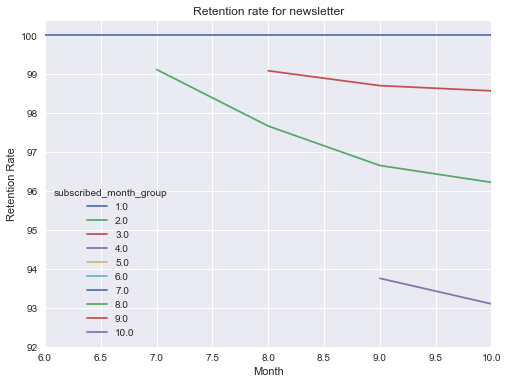

In [800]:
user_retention_newsletter = monthly_cohort_retention(newsletter_data,types_of_emails[1])

In [744]:
user_retention_pregnancy

subscribed_month_group,5.0,6.0,7.0,8.0,9.0,10.0
unsubscribed_month_group,,,,,,
5,100.000000,NaN,NaN,NaN,NaN,NaN
6,100.000000,100.000000,NaN,NaN,NaN,NaN
7,98.425450,97.770644,97.679909,NaN,NaN,NaN
8,95.606867,94.457763,93.869780,95.215979,NaN,NaN
9,93.623761,92.297240,91.666455,91.972489,95.385316,NaN
10,92.811238,91.504474,90.907476,91.020760,93.559620,97.35095


/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


   subscribed_month_group  open_rate       CTR
0                     5.0   0.263611  0.083848
1                     6.0   0.251747  0.076091
2                     7.0   0.285774  0.088242
3                     8.0   0.270454  0.081131
4                     9.0   0.272493  0.083256
5                    10.0   0.282716  0.083920


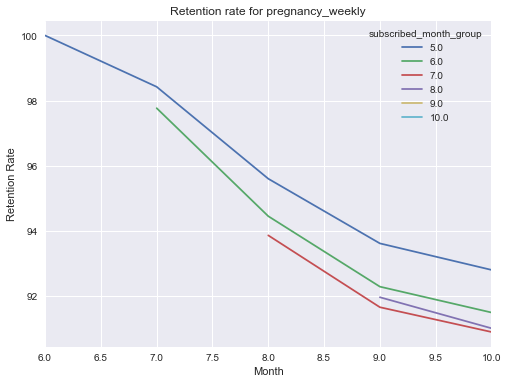

In [801]:
user_retention_pregnancy = monthly_cohort_retention(pregnancy_data,types_of_emails[2])

/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/chinnu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


   subscribed_month_group  open_rate       CTR
0                     1.0   0.151966  0.006406
1                     2.0   0.189445  0.012398
2                     3.0   0.229891  0.012712
3                     4.0   0.247631  0.014777
4                     5.0   0.297965  0.019026
5                     6.0   0.315910  0.020214
6                     7.0   0.261834  0.017710
7                     8.0   0.272772  0.017220
8                     9.0   0.269543  0.019945
9                    10.0   0.000000  0.000000


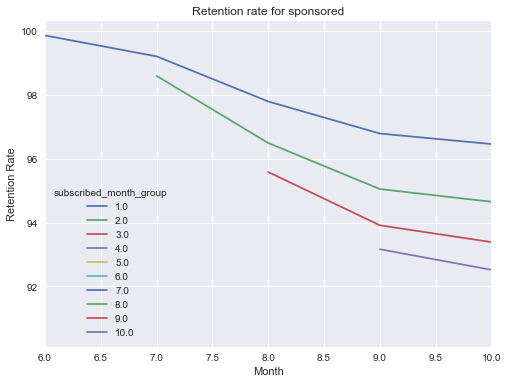

In [802]:
user_retention_sponsored = monthly_cohort_retention(sponsored_data,types_of_emails[3])

Findings-
* Pick the months with the lowest slope in the graph- it shows that for the users that came in that month stayed better than the rest.
* For baby registry data- the users coming in during Jan had the best retention rate- fewer people who subscribed in Jan left. It is the same for the other emails as well (except for pregnancy- since it didnt start in Jan)
* Finding the best cohort with best overall retention rate and showing cohort analysis results for that cohort

In [794]:
user_retention_baby_registry

subscribed_month_group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
unsubscribed_month_group,,,,,,,,,,
1,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.000000,99.998287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
6,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN
7,99.859254,99.729294,99.665491,99.685609,99.558638,99.197171,98.821223,NaN,NaN,NaN
8,99.277504,98.918891,98.467483,98.748330,98.388920,97.577081,95.791146,91.875664,NaN,NaN
9,98.935022,98.336360,97.482108,97.893579,97.362699,96.332245,93.964662,88.501686,90.974188,NaN


In [795]:
user_retention_newsletter

subscribed_month_group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
unsubscribed_month_group,,,,,,,,,,
1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0,99.936998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0,99.881177,99.970921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,99.843663,99.944265,99.863239,NaN,NaN,NaN,NaN,NaN,NaN
5,100.0,99.809739,99.931179,99.710938,99.757658,NaN,NaN,NaN,NaN,NaN
6,100.0,99.775097,99.921001,99.614584,99.633669,99.924168,NaN,NaN,NaN,NaN
7,100.0,99.125158,99.636995,98.343331,98.312058,97.776246,97.817109,NaN,NaN,NaN
8,100.0,97.674865,99.093698,95.660958,95.471581,94.246602,94.064897,96.580422,NaN,NaN
9,100.0,96.663250,98.712760,93.768066,93.282047,92.069135,91.966962,93.581993,96.878822,NaN


In [796]:
user_retention_pregnancy

subscribed_month_group,5.0,6.0,7.0,8.0,9.0,10.0
unsubscribed_month_group,,,,,,
5,100.000000,NaN,NaN,NaN,NaN,NaN
6,100.000000,100.000000,NaN,NaN,NaN,NaN
7,98.425450,97.770644,97.679909,NaN,NaN,NaN
8,95.606867,94.457763,93.869780,95.215979,NaN,NaN
9,93.623761,92.297240,91.666455,91.972489,95.385316,NaN
10,92.811238,91.504474,90.907476,91.020760,93.559620,97.35095


In [797]:
user_retention_sponsored

subscribed_month_group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
unsubscribed_month_group,,,,,,,,,,
1,99.971798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99.938082,99.863092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99.918362,99.831898,99.942843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99.900338,99.795505,99.885685,99.926010,NaN,NaN,NaN,NaN,NaN,NaN
5,99.882102,99.762577,99.841230,99.884904,99.906859,NaN,NaN,NaN,NaN,NaN
6,99.867259,99.731383,99.828528,99.847909,99.839119,99.949894,NaN,NaN,NaN,NaN
7,99.211400,98.599726,98.228121,98.263282,97.828112,97.738945,97.228391,NaN,NaN,NaN
8,97.797899,96.495849,95.586181,95.200904,94.017782,93.793060,92.414544,96.134793,NaN,NaN
9,96.792799,95.052250,93.915915,93.166170,91.469094,90.824252,89.499238,92.569191,96.084940,NaN
